In [1]:
import pandas as pd
import numpy as np

In [2]:
#Loading the data for mini-challenges
#Data contains text messages, we would use it to build a spam classifier.
df = pd.read_csv('../data/spam.csv',encoding='latin-1')
#Feature vectors
X=df['v2']
#target variable
y = df['v1'].replace('ham',1).replace('spam',0)
#All the text data
textall = " ".join(X)

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 1
Create a word-cloud of the data.

(-0.5, 399.5, 199.5, -0.5)

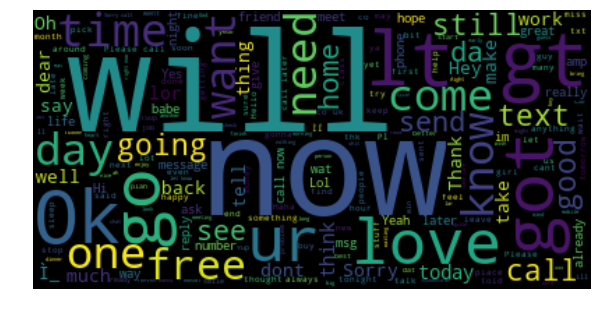

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud().generate(textall)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 2
- Performing Stemming using Porter Stemmer
- Use a Count-Vectorizer to vectorize the data.
    - Also set the appropriate parameters to
        - Tokenise the text data using TreebankWordTokenizer
        - Convert the data to lowercase
        - Remove stop words
        - Use bi-grams
        - Ignore terms that appear in more than 50% of the documents & keep terms that appear in atleat 2 documents

In [4]:
#-----PorterStemmer------
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.porter import PorterStemmer

porter_stemmer = PorterStemmer()
X = X.apply(porter_stemmer.stem)

vect = CountVectorizer()
#Converting data to lowercase
vect.set_params(lowercase=True)

# use TreebankWordTokenizer
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
vect.set_params(tokenizer=tokenizer.tokenize)

# remove English stop words
vect.set_params(stop_words='english')

# include 1-grams and 2-grams
vect.set_params(ngram_range=(1, 2))

# ignore terms that appear in more than 50% of the documents
vect.set_params(max_df=0.5)

# only keep terms that appear in at least 2 documents
vect.set_params(min_df=2)

vect.fit(X)
X_transformed = vect.transform(X)

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 3

- Split the data into train & test.
- Fit a Gaussian Naive Bayes model on your training data.

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_transformed,y)

nb = GaussianNB()
nb.fit(X_train.toarray(),y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 4
- Predict using the test data and get the classification metrics

In [6]:
from sklearn.metrics import classification_report

y_pred = nb.predict(X_test.toarray())
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       195
           1       0.98      0.96      0.97      1198

   micro avg       0.95      0.95      0.95      1393
   macro avg       0.88      0.93      0.90      1393
weighted avg       0.95      0.95      0.95      1393

